In [1]:
from PyCol.col import COL
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt

UNITY_EXE = "../Build_Windows_Demo/UNITY_6_NavOutdoor.exe"
LOG_DIR   = "./logs"

config = {
    'IMG_SIZE': 512,
    'speed_factor': 1,
    'spawn_pedestrians': 0,
    'spawn_cars': 0,
    'move_speed': 2,
    'turn_speed': 0.015,
    'vertical_speed': 1,
    'momentum': 0,
    'fixedDeltaTime': 0.0005,#0.02,#0.0005,
    'number_of_steps': 1,
    'rgb_camera': 1,
    'depth_camera': 1,
    'normals_camera': 1,
    'semantic_camera': 1,
    'vertical_fov': 90,
    'start_x': -2528.0,
    'start_y': 0.1,
    'start_z': -74.0,
    'launch_streaming': 0,
    'render': 0,
}
#UNITY_EXE = None #for launching from unity editor
BATCH_MODE = True #don't display Unity's window
col = COL(UNITY_EXE, LOG_DIR, config,batch_mode = BATCH_MODE)
ok = col.launch()

if ok:
    frames = col.extract_visual_frames()
    px, py, pz, rx, ry, rz = col.extract_xyz()

col.promote_chunk(557)

▶ hyper-parameters sent – waiting for Unity …
✔ Unity acknowledged hyper-parameters – simulation running
4 camera(s) – player at (-2528.00, 0.10, -74.00)
RGB: 512×512  chan=4  off=0x9AC
Depth: 512×512  chan=4  off=0x10009BC
Normals: 512×512  chan=4  off=0x20009CC
Semantic: 512×512  chan=4  off=0x30009DC


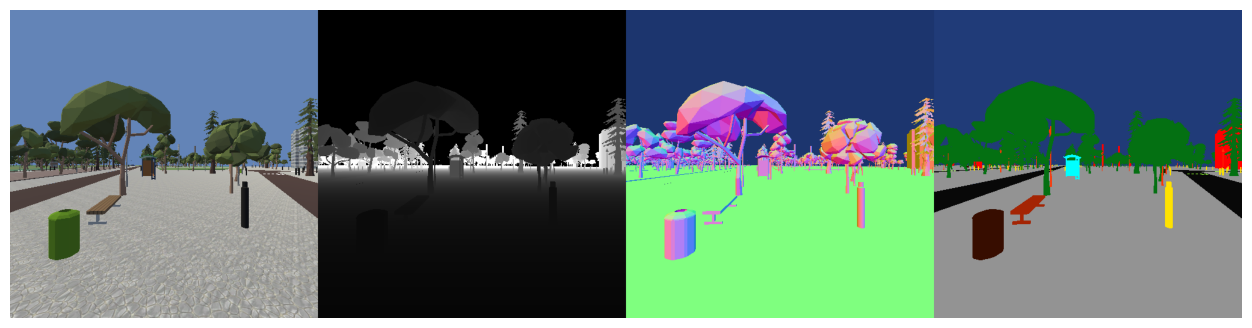

In [171]:
from tqdm import tqdm
import time
fwd, turn, vert, grav = 0,0,0,0

col.write_action_until_frame(fwd,turn,vert,grav)
x,y,z,_,yaw,_ = col.extract_xyz()

rgb, depth, normals, sem = col.extract_visual_frames()
rendering = np.concatenate([rgb,depth,normals,sem],axis=1)

plt.figure(figsize=(18, 4))
plt.imshow(rendering)
plt.axis("off")
plt.show()

